In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crypto = 'crypto_bitcoin'
# crypto = 'crypto_ethereum'
# crypto = 'crypto_xrp'

In [3]:
model = 'CRYPTOBERT'

In [4]:
# filetype =  'submission'
ts_prices = pd.read_csv("Data/Time_Series/prices/bitcoin.csv",index_col='date',parse_dates=['date'])
# ts_post_sentiment = pd.read_csv(f"Data/Time_Series/{crypto}/{model}_{filetype}_sentiment.csv",index_col='posted_on',parse_dates=['posted_on'])
# ts_neg_sub = pd.read_csv(f"Data/Time_Series/{crypto}/negative_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])
# ts_neu_sub = pd.read_csv(f"Data/Time_Series/{crypto}/neutral_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])

In [5]:
# filetype =  'comment'
# ts_com_sentiment = pd.read_csv(f"Data/Time_Series/{crypto}/{model}_{filetype}_sentiment.csv",index_col='posted_on',parse_dates=['posted_on'])


In [5]:
for filetype in ['submission','comment']:
    df = pd.read_csv(f"Data/Time_Series/{crypto}/{model}_{filetype}_sentiment.csv",index_col='posted_on',parse_dates=['posted_on'])
    # df['value'] = round((df.iloc[:,0]/df.iloc[:,1])*100,2)
    for col in df.columns[:3]:
        ts_prices[f"{filetype}_{col}_prop"] = df[col]/df['total_posts']
    ts_prices[f"total_{filetype}"] = df['total_posts']

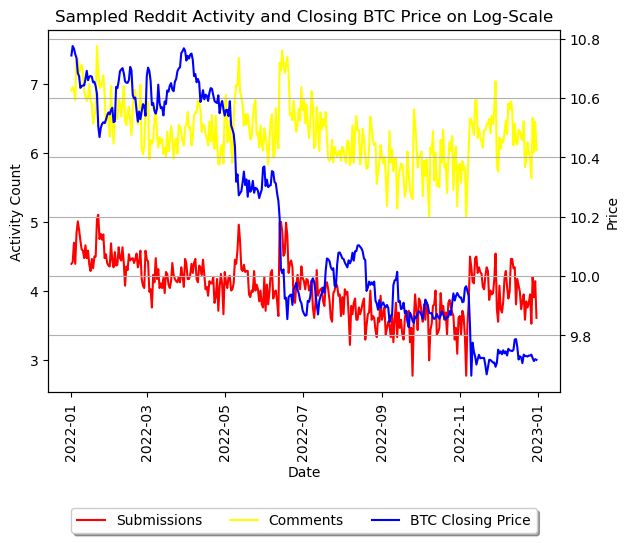

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices['price'])
data2 = np.log(ts_prices['total_submission'])
data3 = np.log(ts_prices['total_comment'])

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('date')
ax1.set_ylabel('Activity Count', color='black')
ax1.plot(ts_prices.index, data2, color=color, label='Submissions')
ax1.tick_params(axis='y', labelcolor='black')

color = 'yellow'
ax1.plot(ts_prices.index, data3, color=color, label='Comments')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Price', color='black')  # we already handled the x-label with ax1
ax2.plot(ts_prices.index, data1, color=color, label='BTC Closing Price')
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelrotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
ax1.set_xlabel('Date', color='black') 

plt.title('Sampled Reddit Activity and Closing BTC Price on Log-Scale')
# plt.xticks(ts_pos_sub.index)
plt.grid()
plt.show()

In [7]:
ts_prices.columns

Index(['price', 'submission_Negative_prop', 'submission_Neutral_prop',
       'submission_Positive_prop', 'total_submission', 'comment_Negative_prop',
       'comment_Neutral_prop', 'comment_Positive_prop', 'total_comment'],
      dtype='object')

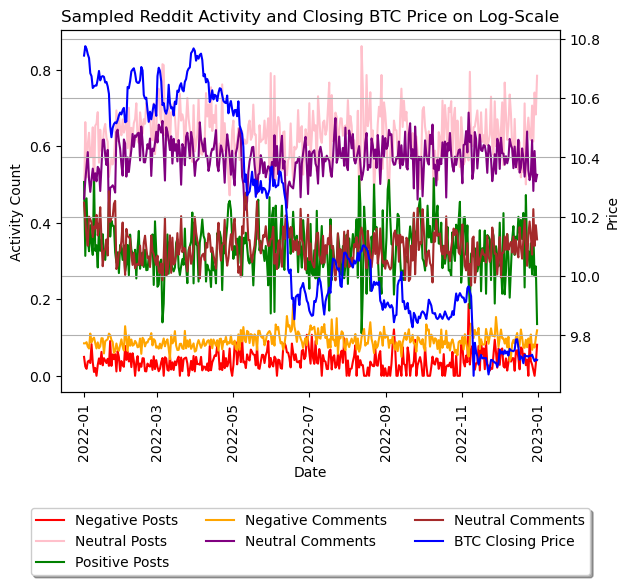

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices['price'])
data2 = ts_prices['submission_Negative_prop']
data3 = ts_prices['submission_Neutral_prop']
data4 = ts_prices['submission_Positive_prop']
data5 = ts_prices['comment_Negative_prop']
data6 = ts_prices['comment_Neutral_prop']
data7 = ts_prices['comment_Positive_prop']

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('date')
ax1.set_ylabel('Activity Count', color='black')
ax1.plot(ts_prices.index, data2, color=color, label='Negative Posts')
ax1.tick_params(axis='y', labelcolor='black')

color = 'pink'
ax1.plot(ts_prices.index, data3, color=color, label='Neutral Posts')

color = 'green'
ax1.plot(ts_prices.index, data4, color=color, label='Positive Posts')

color = 'orange'
ax1.plot(ts_prices.index, data5, color=color, label='Negative Comments')

color = 'purple'
ax1.plot(ts_prices.index, data6, color=color, label='Neutral Comments')

color = 'brown'
ax1.plot(ts_prices.index, data7, color=color, label='Neutral Comments')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Price', color='black')  # we already handled the x-label with ax1
ax2.plot(ts_prices.index, data1, color=color, label='BTC Closing Price')
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelrotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
ax1.set_xlabel('Date', color='black') 

plt.title('Sampled Reddit Activity and Closing BTC Price on Log-Scale')
# plt.xticks(ts_pos_sub.index)
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices['price'])
data2 = np.log(ts_post_sentiment['total_posts'])
data3 = np.log(ts_com_sentiment['total_posts'])

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('date')
ax1.set_ylabel('Activity Count', color='black')
ax1.plot(ts_prices.index, data2, color=color, label='Submissions')
ax1.tick_params(axis='y', labelcolor='black')

color = 'yellow'
ax1.plot(ts_prices.index, data3, color=color, label='Comments')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Price', color='black')  # we already handled the x-label with ax1
ax2.plot(ts_post_sentiment.index, data1, color=color, label='BTC Closing Price')
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelrotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
ax1.set_xlabel('Date', color='black') 

plt.title('Sampled Reddit Activity and Closing BTC Price on Log-Scale')
# plt.xticks(ts_pos_sub.index)
plt.grid()
plt.show()

In [12]:
# crypto = 'crypto_bitcoin'
crypto = 'crypto_ethereum'
# crypto = 'crypto_xrp'

In [13]:
filetype =  'submission'
ts_prices = pd.read_csv("Data/Time_Series/prices/ethereum.csv",index_col='date',parse_dates=['date'])
ts_pos_sub = pd.read_csv(f"Data/Time_Series/{crypto}/positive_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])
# ts_neg_sub = pd.read_csv(f"Data/Time_Series/{crypto}/negative_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])
# ts_neu_sub = pd.read_csv(f"Data/Time_Series/{crypto}/neutral_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])

In [14]:
filetype =  'comment'
ts_pos_com = pd.read_csv(f"Data/Time_Series/{crypto}/positive_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])


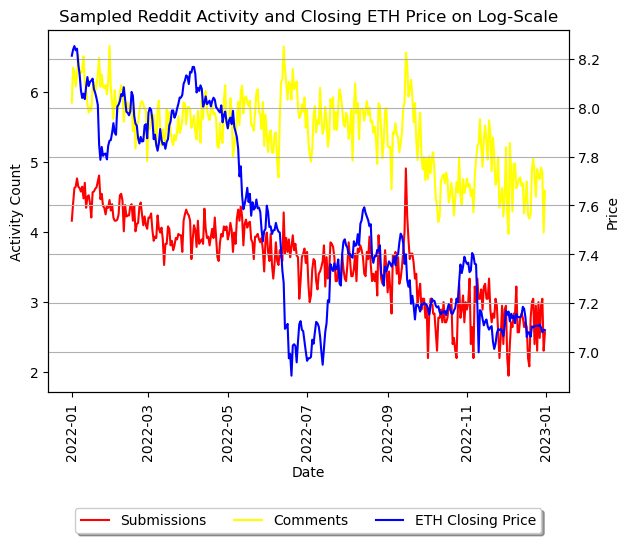

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices['price'])
data2 = np.log(ts_pos_sub['total_posts'])
data3 = np.log(ts_pos_com['total_posts'])

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('date')
ax1.set_ylabel('Activity Count', color='black')
ax1.plot(ts_prices.index, data2, color=color, label='Submissions')
ax1.tick_params(axis='y', labelcolor='black')

color = 'yellow'
ax1.plot(ts_prices.index, data3, color=color, label='Comments')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Price', color='black')  # we already handled the x-label with ax1
ax2.plot(ts_pos_sub.index, data1, color=color, label='ETH Closing Price')
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelrotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
ax1.set_xlabel('Date', color='black') 

plt.title('Sampled Reddit Activity and Closing ETH Price on Log-Scale')
# plt.xticks(ts_pos_sub.index)
plt.grid()
plt.show()

In [6]:
ts_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [7]:
ts_prices.describe()

,price
count,365.000000
mean,28296.800712
std,10236.056993
min,15742.440000
25%,19563.770000
50%,23203.680000
75%,39200.300000
max,47816.080000


In [13]:
ts_pos.describe()

,Positive,total_posts
count,365.000000,365.000000
mean,20.484932,61.775342
std,9.947550,25.134669
min,4.000000,16.000000
25%,14.000000,43.000000
50%,18.000000,57.000000
75%,25.000000,77.000000
max,70.000000,165.000000


In [14]:
ts_prices_m = ts_prices[ts_prices.index.is_month_start]
ts_pos_m = ts_pos[ts_pos.index.is_month_start]
ts_neg_m = ts_neg[ts_neg.index.is_month_start]
ts_neu_m = ts_neu[ts_neu.index.is_month_start]

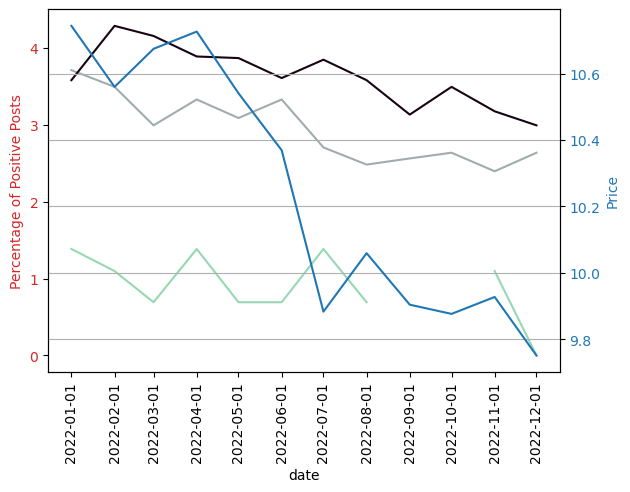

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices_m['price'])
data2 = np.log(ts_pos_m['Positive'])
data3 = np.log(ts_neg_m['Negative'])
data4 = np.log(ts_neu_m['Neutral'])
# days = mdates.drange(ts_prices_m.index.min(),ts_prices_m.index.max()+dt.timedelta(months=1),dt.timedelta(months=1))
# days
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Percentage of Positive Posts', color=color)
ax1.plot(ts_prices_m.index, data2, color='#A0ACAD')
ax1.plot(ts_prices_m.index, data3, color='#97D8B2')
ax1.plot(ts_prices_m.index, data4, color='#170312')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_pos_m.index, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.tick_params(axis='x', labelrotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.figure().set_figwidth(20)
plt.xticks(ts_pos_m.index)
plt.grid()
plt.show()

In [11]:
ts_prices_w = ts_prices[ts_prices.index.dayofweek == 0]
ts_pos_w = ts_pos[ts_pos.index.dayofweek == 0]

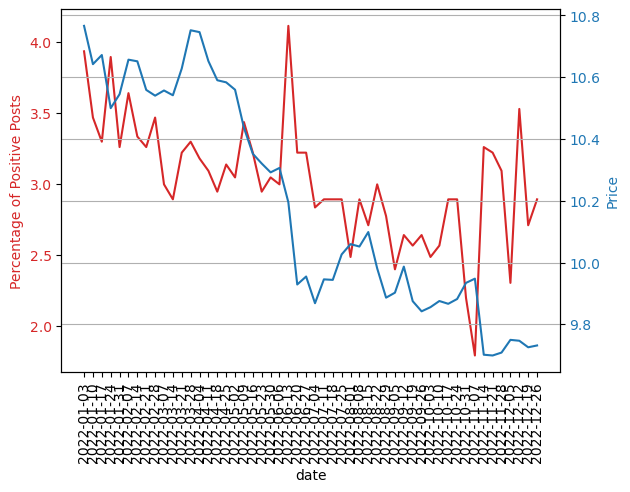

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices_w['price'])
data2 = np.log(ts_pos_w['Positive'])
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Percentage of Positive Posts', color=color)
ax1.plot(ts_prices_w.index, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_pos_w.index, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.tick_params(axis='x', labelrotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.xticks(ts_pos_w.index)
plt.grid()
plt.show()